In [2]:
import pymrio
import matplotlib as plt
import pandas as pd
import numpy as np
from os import chdir, getcwd

Choose current directory

In [3]:
wd=getcwd()
chdir(wd)

### Pymrio test example from the guide

In [2]:
test_mrio = pymrio.load_test()

In [4]:
#print(test_mrio.get_sectors())
#print(test_mrio.get_regions())

The top level level function calc_all checks the IO System and its extensions for missing parts and calculate these. This function calls the speciﬁc calculation method for the core system and for the extensions.

In [5]:
test_mrio.calc_all()

**A** - inter-industry coefficients (direct requirements matrix)

In [ ]:
test_mrio.A.head(1)

**D_cba** - Consumption based accounts  
**D_exp** - export accounts   
**D_imp** - import accounts  

In [ ]:
est_mrio.emissions.D_cba.head()
test_mrio.emissions.D_exp.head()
test_mrio.emissions.D_imp.head()

**F** - factor production

In [ ]:
test_mrio.emissions.F.head()

**Y** - final demand matrix

In [ ]:
test_mrio.Y.head()

**x** - total output, deﬁned as column vector

In [ ]:
test_mrio.x.head()

**Z** - transactions matrix, inter industry ﬂows

In [ ]:
test_mrio.Z.head()

## TEST PYMRIO for PAPER

Show the folder. The pymrio parser works with the compressed (zip) ﬁles as well as the unpacked ﬁles.

MrIOT IxI fpa coefﬁcient version2 2 2 for the industry by industry (ixi) MRIO system. E.g. -  **'Cultivation of paddy rice'**

MrIOT PxP ita coefﬁcient version2 2 2 for the product by product (pxp) MRIO system. E.g. -  **'Paddy rice'**

First parse the downloaded exiobase (zip) and save it to the folder.

In [ ]:
exio3 = pymrio.parse_exiobase3(path='./exio3/exiobase3.4_iot_2011_pxp.zip')
exio3.calc_all()
exio3.save_all(path='./exio_org')

Load the parsed exiobase

In [37]:
io_new_safe = pymrio.load_all(path='./exio_org')
io_new = io_new_safe.copy()

#### Study initial tables before calculating all
**A** - inter-industry coefficients 𝐴 = 𝑍 𝑥^(−1)  
**Y** - final demand  
**unit** - units

In [6]:
#io_new_safe.A.head()
#io_new_safe.Y.head()
#io_new_safe.unit.head()

#### Study initial tables indexes and metadata

In [78]:
#io_new_safe.meta
#io_new_safe.get_sectors()
#io_new_safe.get_index()

MultiIndex([('AT',                                          'Paddy rice'),
            ('AT',                                               'Wheat'),
            ('AT',                                   'Cereal grains nec'),
            ('AT',                             'Vegetables, fruit, nuts'),
            ('AT',                                           'Oil seeds'),
            ('AT',                              'Sugar cane, sugar beet'),
            ('AT',                                  'Plant-based fibers'),
            ('AT',                                           'Crops nec'),
            ('AT',                                              'Cattle'),
            ('AT',                                                'Pigs'),
            ...
            ('WM',                       'Paper for treatment: landfill'),
            ('WM',               'Plastic waste for treatment: landfill'),
            ('WM', 'Inert/metal/hazardous waste for treatment: landfill'),
         

#### See extensions - satellites

In [8]:
list(io_new_safe.get_extensions())

['satellite']

#### Study initial satellite tables before calculating all
F - final resource transfer coefficient matrix  
F_hh - ???  
unit - units  

In [40]:
#io_new_safe.satellite.F.head()
#io_new_safe.satellite.F_hh.head()
#io_new_safe.satellite.unit.head(1)

#### Study initial satellite tables indexes

In [73]:
#io_new_safe.satellite.get_sectors()
#io_new_safe.satellite.get_regions()
io_new_safe.satellite.get_index()
#io_new_safe.satellite.get_rows()

Index(['Taxes less subsidies on products purchased: Total',
       'Other net taxes on production',
       'Compensation of employees; wages, salaries, & employers social contributions: Low-skilled',
       'Compensation of employees; wages, salaries, & employers social contributions: Medium-skilled',
       'Compensation of employees; wages, salaries, & employers social contributions: High-skilled',
       'Operating surplus: Consumption of fixed capital',
       'Operating surplus: Rents on land',
       'Operating surplus: Royalties on resources',
       'Operating surplus: Remaining net operating surplus',
       'Employment: Low-skilled male',
       ...
       'Water Withdrawal Blue - Electricity - once-through - Electricity by hydro',
       'Water Withdrawal Blue - Electricity - once-through - Electricity by wind',
       'Water Withdrawal Blue - Electricity - once-through - Electricity by petroleum and other oil derivatives',
       'Water Withdrawal Blue - Electricity - once-

#### See all coal types in the data index
level 1 - sectors, level 0 - regions  
filter_c - filters for keawords in the index to spot all items related to cosen coal types.

In [72]:
filter_c=io_new_safe.Y.index.get_level_values(1).str.contains('coal', case=False, regex=False)
coal_types=io_new_safe.Y.index.get_level_values(1)[filter_c].drop_duplicates()
coal_types

Index(['Coking Coal', 'Other Bituminous Coal', 'Sub-Bituminous Coal',
       'Lignite/Brown Coal', 'Coal Tar', 'Charcoal', 'Electricity by coal'],
      dtype='object', name='sector')

In [74]:
io_new_safe.Y.loc[[('AU','Anthracite')]]

region                                                     AT  \
category          Final consumption expenditure by households   
region sector                                                   
AU     Anthracite                                         0.0   

region                                                                                                  \
category          Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                            
AU     Anthracite                                                0.0                                     

region                                                         \
category          Final consumption expenditure by government   
region sector                                                   
AU     Anthracite                                         0.0   

region                                                                  \
category          Gross fixed capital formation Changes in inventories   
region sector                                                            
AU     Anthracite                           0.0                    0.0   

region                                                       \
category          Changes in valuables Exports: Total (fob)   
region sector                                                 
AU     Anthracite                    0                    0   

region                                                     BE  \
category          Final consumption expenditure by households   
region sector                                                   
AU     Anthracite                                         0.0   

region                                                                                                  \
category          Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                            
AU     Anthracite                                                0.0                                     

region                                                         ...  \
category          Final consumption expenditure by government  ...   
region sector                                                  ...   
AU     Anthracite                                         0.0  ...   

region                                WF                       \
category          Changes in inventories Changes in valuables   
region sector                                                   
AU     Anthracite                    0.0                  0.0   

region                                  \
category          Exports: Total (fob)   
region sector                            
AU     Anthracite                    0   

region                                                     WM  \
category          Final consumption expenditure by households   
region sector                                                   
AU     Anthracite                                    0.006366   

region                                                                                                  \
category          Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                            
AU     Anthracite                                            0.00001                                     

region                                                         \
category          Final consumption expenditure by government   
region sector                                                   
AU     Anthracite                                    0.000364   

region                                                                  \
category          Gross fixed capital formation Changes in inventories   
region sect

#### Following lines are to study the structure of the MRIO tables  
*after they are calculated*

To calculate all tables start with:

In [8]:
io_new_safe.calc_all()

#### The following tables occur as soon as calculation of the MRIO is done.

**x** - total output, deﬁned as column vector  𝑥 = 𝑍𝑒 + 𝑌𝑒  
**L** - total requirement matrix (Leontief matrix)  
**Z** - transactions matrix, inter industry ﬂows

In [43]:
#io_new_safe.x.head(1)
#io_new_safe.L.head(1)
#io_new_safe.Z.head(1)

#### The following *satelite* tables occur as soon as calculation of the MRIO is done.

**D_cba** - total requirements (footprints in case of environmental requirements) for any given ﬁnal demand vector 𝑦  
**D_exp** - the factors of production occurring domestically to satisfy ﬁnal demand in other countries  
**D_imp** - factor of production occurring abroad (embodied in imports).      *Setting the domestically satisﬁed ﬁnal demand 𝑌𝑖 ,𝑖 to zero (𝑌𝑡 = 𝑌 − 𝑌𝑖 ,𝑗 | 𝑖 = 𝑗) allow to calculate the factor of production occurring abroad (embodied in imports)*  
**D_pba**  - production based accounts (direct territorial requirements) per country  
𝐷𝑖 𝑐𝑏𝑎 = 𝐷𝑖 𝑝𝑏𝑎 + 𝐷𝑖 𝑖𝑚𝑝 − 𝐷𝑖 𝑒𝑥𝑝

**..._reg** - add to the name to see matrixes per region and not industry

In [44]:
#io_new_safe.satellite.D_cba.head()
#io_new_safe.satellite.D_exp.head()
#io_new_safe.satellite.D_imp.head()
#io_new_safe.satellite.D_pba.head()
#io_new_safe.satellite.D_pba_reg.head(1)
#io_new_safe.satellite.D_cba_reg.head()
#io_new_safe.satellite.D_imp_reg.head()
#io_new_safe.satellite.D_exp_reg.head()

Check what indexes in satellite pba production based accounts related to coal or other search items:  
filter_1 - fiters for accounts directly connected to coal production  
filter_2 - filters for units of the selected accounts

In [77]:
filter_1=io_new_safe.satellite.D_pba_reg.index.str.contains('coal', regex=False)
io_new_safe.satellite.D_pba_reg.index[io_new_safe.satellite.D_pba_reg.index.str.contains('coal', regex=False)]

Index(['CH4 - non combustion - Mining of bituminous coal - air',
       'CH4 - non combustion - Mining of coking coal - air',
       'CH4 - non combustion - Mining of lignite (brown coal) - air',
       'CH4 - non combustion - Mining of sub-bituminous coal - air',
       'PM10 - non combustion - Mining of bituminous coal - air',
       'PM10 - non combustion - Mining of coking coal - air',
       'PM10 - non combustion - Mining of lignite (brown coal) - air',
       'PM10 - non combustion - Mining of sub-bituminous coal - air',
       'PM2.5 - non combustion - Mining of bituminous coal - air',
       'PM2.5 - non combustion - Mining of coking coal - air',
       'PM2.5 - non combustion - Mining of lignite (brown coal) - air',
       'PM2.5 - non combustion - Mining of sub-bituminous coal - air',
       'TSP - non combustion - Mining of bituminous coal - air',
       'TSP - non combustion - Mining of coking coal - air',
       'TSP - non combustion - Mining of lignite (brown coal) - air

In [68]:
print(type(io_new_safe.satellite.D_pba_reg[filter_1]))
io_new_safe.satellite.D_pba_reg[filter_1][['AU']]

<class 'pandas.core.frame.DataFrame'>


,AU
CH4 - non combustion - Mining of bituminous coal - air,1.150362e+09
CH4 - non combustion - Mining of coking coal - air,1.188367e+09
CH4 - non combustion - Mining of lignite (brown coal) - air,2.061367e+07
CH4 - non combustion - Mining of sub-bituminous coal - air,3.381264e+08
PM10 - non combustion - Mining of bituminous coal - air,3.905692e+06
PM10 - non combustion - Mining of coking coal - air,4.034727e+06
PM10 - non combustion - Mining of lignite (brown coal) - air,2.325417e+06
PM10 - non combustion - Mining of sub-bituminous coal - air,1.148002e+06
PM2.5 - non combustion - Mining of bituminous coal - air,5.325750e+05
PM2.5 - non combustion - Mining of coking coal - air,5.501700e+05


<AxesSubplot:>

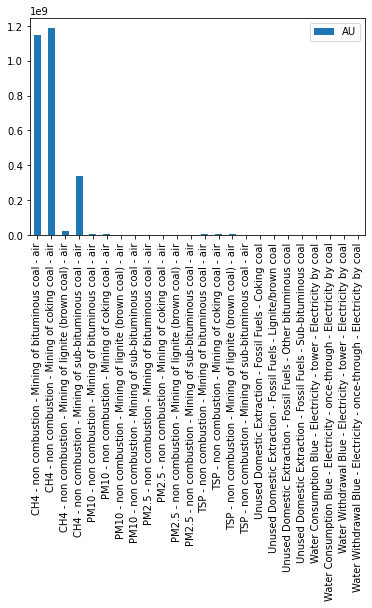

In [70]:
coal_effects=io_new_safe.satellite.D_pba_reg[filter_1][['AU']]
coal_effects.plot.bar()

In [47]:
filter_2=io_new_safe.satellite.unit.index.str.contains('coal', regex=False)
#io_new_safe.satellite.unit[filter_2]

## Australia
### Set final demand to "0" except for the coal sector
To calculate for the new ﬁnal demand we have to remove everything from the system except for the coefﬁcients (A,L,S,M)

**A** - direct requirement matrix 𝐴 is given by multiplication of transaction matrix 𝑍 with the diagonalised and inverted industry output 𝑥.  
**L** - total requirement matrix (Leontief matrix).  
**S** - factor of production coefﬁcients.  
**M** - multipliers for 𝐹 are obtained by **M=SL**  

If the factor of production represent required **environmental impacts**, these can also occur during the ﬁnal use phase. In that case **𝐺** describe the impacts associated with ﬁnal demand.

In [62]:
io_new.reset_all_to_coefficients()

In [63]:
io_new.Y = io_new_safe.Y * 0 
#io_new.Y.head()

In [64]:
io_new.Y.loc[('AU','Coking Coal'),('AU', 'Exports: Total (fob)')]=1000
#io_new.Y.loc[('AU','Coking coal'),('AU', 'Exports: Total (fob)')]

In [65]:
io_new.calc_all()

In [66]:
print(type(io_new.satellite.D_pba_reg[filter_1]))
io_new.satellite.D_pba_reg[filter_1][['AU']]

<class 'pandas.core.frame.DataFrame'>


region,AU
CH4 - non combustion - Mining of bituminous coal - air,2.030578e+08
CH4 - non combustion - Mining of coking coal - air,2.097663e+08
CH4 - non combustion - Mining of lignite (brown coal) - air,3.638651e+06
CH4 - non combustion - Mining of sub-bituminous coal - air,5.968487e+07
PM10 - non combustion - Mining of bituminous coal - air,6.894188e+05
PM10 - non combustion - Mining of coking coal - air,7.121956e+05
PM10 - non combustion - Mining of lignite (brown coal) - air,4.104743e+05
PM10 - non combustion - Mining of sub-bituminous coal - air,2.026412e+05
PM2.5 - non combustion - Mining of bituminous coal - air,9.400824e+04
PM2.5 - non combustion - Mining of coking coal - air,9.711405e+04


<AxesSubplot:>

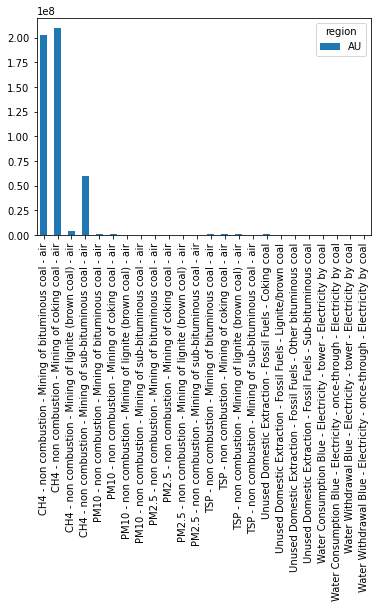

In [67]:
coal_effects=io_new.satellite.D_pba_reg[filter_1][['AU']]
coal_effects.plot.bar()